### Importing librarires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading Dataset

In [2]:
dataset = pd.read_csv("Final_data.csv")

### Heatmap to get correlations between features 

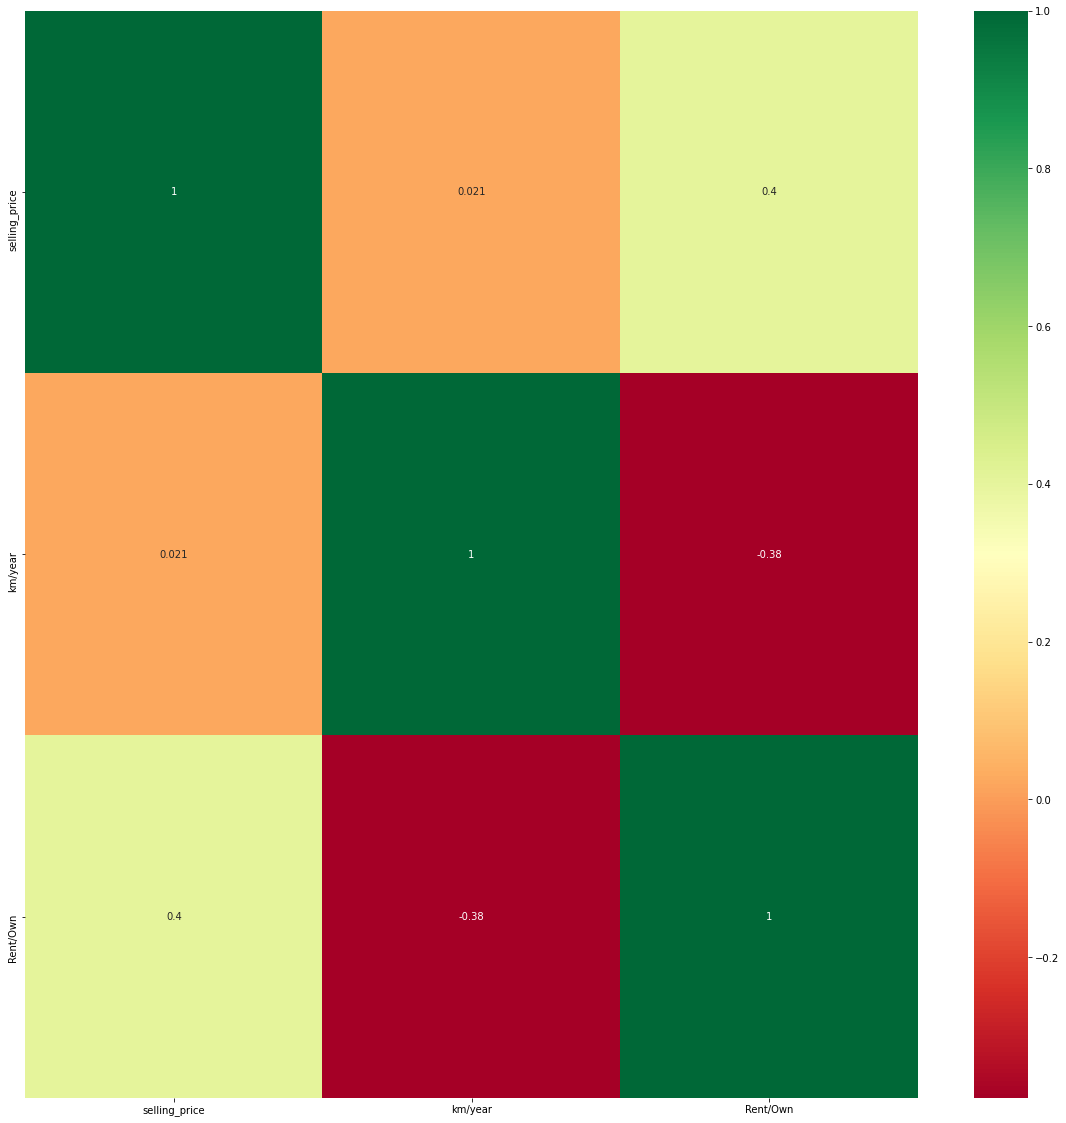

In [3]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Transforming catergorical variable 

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting data into training and test sets 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
X_train = X_train[:, 1: ]
X_test = X_test[:, 1: ]

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_d = DecisionTreeClassifier()

### Specifying hyperparameters to consider 

In [14]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features =['auto', 'log2', 'sqrt', None]

### Creating Random Grid 

In [15]:
random_grid = {'criterion' : criterion,
               "splitter" : splitter,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

In [16]:
d_r = RandomizedSearchCV(estimator = classifier_d, param_distributions = random_grid, n_iter = 10, cv = 8, n_jobs = 1)

In [17]:
d_r.fit(X_train, y_train)
y_pred_d = d_r.predict(X_test)

### Checking accuracy of the model 

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_d)
print(cm)
accuracy_score(y_test, y_pred_d)

[[246   8]
 [ 20 213]]


0.9425051334702259

### Pickling 

In [21]:
import pickle
file = open('rent_vs_buy_d_tree_model.pkl', 'wb')

In [ ]:
pickle.dump(d_r, file)